# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


Practical Exam - Fitness Class **JUAN PABLO MONTOYA VALLEJO**



Instructions
    ● Use Python or R to perform the tasks required
    ● Write your solutions in the workspace provided from your certification page
    ● Include all of the visualizations you create to complete the tasks
    ● Visualizations must be visible in the published version of the workspace. Links to
    external visualizations will not be accepted.
    ● You do not need to include code unless the question says you must
    Background


GoalZone is a fitness club chain in Canada.
GoalZone offers a range of fitness classes in two capacities - 25 and 15.
Some classes are always fully booked. Fully booked classes often have a low attendance rate.
GoalZone wants to increase the number of spaces available for classes.
They want to do this by predicting whether the member will attend the class or not.
If they can predict a member will not attend the class, they can make another space
available

#  Libraries and previous configurations

In [4]:
## IMPORTING NECESARY LIBRARIES
# Data management
# ==============================================================================
import numpy as np
import pandas as pd
import math
from scipy.stats import zscore
# Drawing graphics
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
sns.set()
#Import ML models and peformance metrics
# ==============================================================================
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
#Scaling Variables
# ==============================================================================
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
#Creation of machine learning models
# ==============================================================================
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

In [5]:
## Useful multiplot function
#============================================================================
def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    '''
    Función para graficar un plot con multiples gráficas del mismo tipo:

    df       : dataframe 
    cols     : lista de columnas a graficar
    num_cols : número de columnas 
    num_rows : número de filas
    tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
    targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
               Para countplot no es necesario (None)
    figsize  : tamaño del plot. Valor por defecto (16,8)

    *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols

    Ejemplos:     
       plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
       plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
       plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
    '''
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

## Loading and exploring the data

In [6]:
data=pd.read_csv('fitness_class_2212.csv')

In [7]:
data.shape

(1500, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [9]:
data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [10]:
data.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


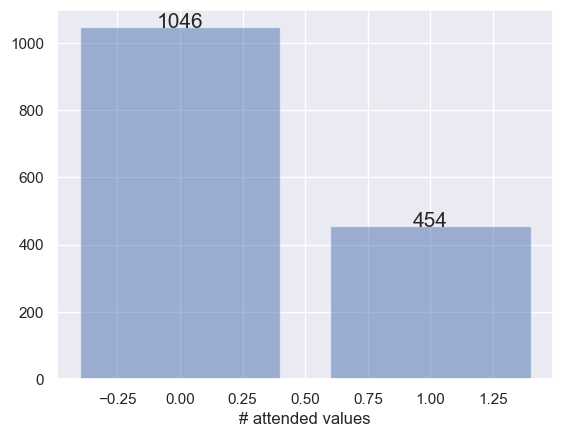

In [11]:
counts = data["attended"].value_counts()
plt.bar(counts.index, counts.values,color='b',alpha=0.5)
for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha="center",fontsize =15)
plt.xlabel('# attended values')
plt.show()

## Task 1 
### 1. For every column in the data:
    a. State whether the values match the description given in the table above.
    b. State the number of missing values in the column.
    c. Describe what you did to make values match the description if they did not
    match.

### booking_id Nominal.
The unique identifier of the booking.
Missing values are not possible due to the database structure.

In [12]:
booking_id_duplicates=data['booking_id'].duplicated().sum()
booking_id_missing_values=data['booking_id'].isna().sum()
booking_id_unique=len(data['booking_id'].unique())
print(f'there are {booking_id_duplicates} duplicated rows and {booking_id_missing_values} missing values in the column booking_id and also has {booking_id_unique} unique values \n\n')

there are 0 duplicated rows and 0 missing values in the column booking_id and also has 1500 unique values 




Based on the information provided, it appears that the column "booking_id" has no duplicated rows and no missing values, and contains 1500 unique values. This is a good indication that the "booking_id" column is a **good identifier** and can be used for referencing specific bookings

### months_as_member
Discrete. The number of years as this fitness club member,
minimum 1 month.
Replace missing values with the overall average year.

In [13]:
months_as_member_missing_values=data['months_as_member'].isna().sum()
months_as_member_unique=len(data['months_as_member'].unique())
months_as_member_type=data['months_as_member'].dtype
print(f'there are {months_as_member_missing_values} missing values in the column months_as_member and  {months_as_member_unique} unique values and its type is {months_as_member_type} \n\n')

there are 0 missing values in the column months_as_member and  72 unique values and its type is int64 




### weight
Continuous. The member's weight in kg, rounded to 2 decimal
places. The minimum possible value is 40.00 kg.
Replace missing values with the overall average weight

In [14]:
data['weight'].describe()

count    1480.000000
mean       82.610378
std        12.765859
min        55.410000
25%        73.490000
50%        80.760000
75%        89.520000
max       170.520000
Name: weight, dtype: float64

In [15]:
assert data['weight'].min()>40

In [16]:
data['weight']=data['weight'].round(2)

In [17]:
data['weight'].isna().sum()

20

In [18]:
data['weight']=data['weight'].fillna(data['weight'].mean())

In [19]:
data['weight'].isna().sum()

0

in the column weight i found missing values so i replace them with the mean value of the column

### days_before
Discrete. The number of days before the class the member
registered, minimum 1 day.
Replace missing values with 0.

In [20]:
days_before_missing_values=data['days_before'].isna().sum()
days_before_unique=len(data['days_before'].unique())
days_before_type=data['days_before'].dtype
print(f'there are {days_before_missing_values} missing values in the column days_before and  {days_before_unique} unique values and its type is {days_before_type} \n\n')

there are 0 missing values in the column days_before and  31 unique values and its type is object 




In [21]:
data['days_before'].value_counts().keys()

Index(['10', '2', '8', '12', '14', '4', '6', '7', '3', '5', '11', '13', '15',
       '9', '1', '10 days', '14 days', '12 days', '6 days', '4 days', '16',
       '17', '20', '2 days', '5 days', '7 days', '8 days', '1 days', '3 days',
       '13 days', '29'],
      dtype='object')

In [22]:
data['days_before']=data['days_before'].str.replace(' days','').astype('int')

In [23]:
data['days_before'].value_counts().keys()

Int64Index([10, 2, 8, 12, 14, 4, 6, 7, 3, 5, 13, 11, 9, 15, 1, 16, 17, 20, 29], dtype='int64')

in the day_before column i found both integers and strings values  so a replace them with string methods and convert the column to integer

### day_of_week
Ordinal. The day of the week of the class. One of “Mon”, “Tue”, “Wed”,
“Thu”, “Fri”, “Sat” or “Sun”.
Replace missing values with “unknown”.

In [24]:
day_of_week_missing_values=data['day_of_week'].isna().sum()
day_of_week_unique=len(data['day_of_week'].unique())
day_of_week_type=data['day_of_week'].dtype
print(f'there are {day_of_week_missing_values} missing values in the column day_of_week and  {day_of_week_unique} unique values and its type is {day_of_week_type} \n\n')

there are 0 missing values in the column day_of_week and  10 unique values and its type is object 




In [25]:
data['day_of_week'].value_counts().keys()

Index(['Fri', 'Thu', 'Mon', 'Sun', 'Sat', 'Tue', 'Wed', 'Wednesday', 'Fri.',
       'Monday'],
      dtype='object')

In [26]:
data['day_of_week']=data['day_of_week'].str.replace('nesday','').replace('Fri.','Fri').replace('Monday','Mon')

In [27]:
data['day_of_week'].value_counts().keys()

Index(['Fri', 'Thu', 'Mon', 'Sun', 'Sat', 'Tue', 'Wed'], dtype='object')

In [28]:
data['day_of_week']=data['day_of_week'].astype('category')

in the day_of_week column i found data that doesnt match the default values of the columns, i modified those columns to match the criteria

### time
Ordinal. The time of day of the class. Either “AM” or “PM”.
Replace missing values with “unknown”.

In [29]:
time_missing_values=data['time'].isna().sum()
time_unique=len(data['time'].unique())
time_type=data['time'].dtype
print(f'there are {time_missing_values} missing values in the column time and  {time_unique} unique values and its type is {time_type} \n\n')

there are 0 missing values in the column time and  2 unique values and its type is object 




In [30]:
data['time'].value_counts().keys()

Index(['AM', 'PM'], dtype='object')

In [31]:
data['time']=data['time'].astype('category')

i change the column as category as i should be for a categorical feature

### category
Nominal. The category of the fitness class. One of “Yoga”, “Aqua”,
“Strength”, “HIIT”, or “Cycling”.
Replace missing values with “unknown”

In [32]:
category_missing_values=data['category'].isna().sum()
category_unique=len(data['category'].unique())
category_type=data['category'].dtype
print(f'there are {category_missing_values} missing values in the column category and  {category_unique} unique values and its type is {category_type} \n\n')

there are 0 missing values in the column category and  6 unique values and its type is object 




In [33]:
data['category'].value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64

In [34]:
data['category']=data['category'].str.replace('-','unknown')

In [35]:
data['category']=data['category'].astype('category')

i found missing data label as '-' so i changed them to the default valule for missing data which is 'unknown'

### attended
Nominal. Whether the member attended the class (1) or not (0).
Missing values should be removed.

In [36]:
attended_missing_values=data['attended'].isna().sum()
attended_unique=len(data['attended'].unique())
attended_type=data['attended'].dtype
print(f'there are {attended_missing_values} missing values in the column attended and  {attended_unique} unique values and its type is {attended_type} \n\n')

there are 0 missing values in the column attended and  2 unique values and its type is int64 




In [37]:
data['attended']=data['attended'].astype('category')

### FINAL RESULT

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   category
dtypes: category(4), float64(1), int64(3)
memory usage: 53.7 KB


## Task 2
### 2. Create a visualization that shows how many bookings attended the class. Use the visualization to:
    a. State which category has the most observations
    b. Explain whether the observations are balanced across categories

In [39]:
data_cat=data[data.select_dtypes('category').columns]
data_num=data[data.select_dtypes('int64').columns.tolist()+data.select_dtypes('float64').columns.tolist()+['attended']]

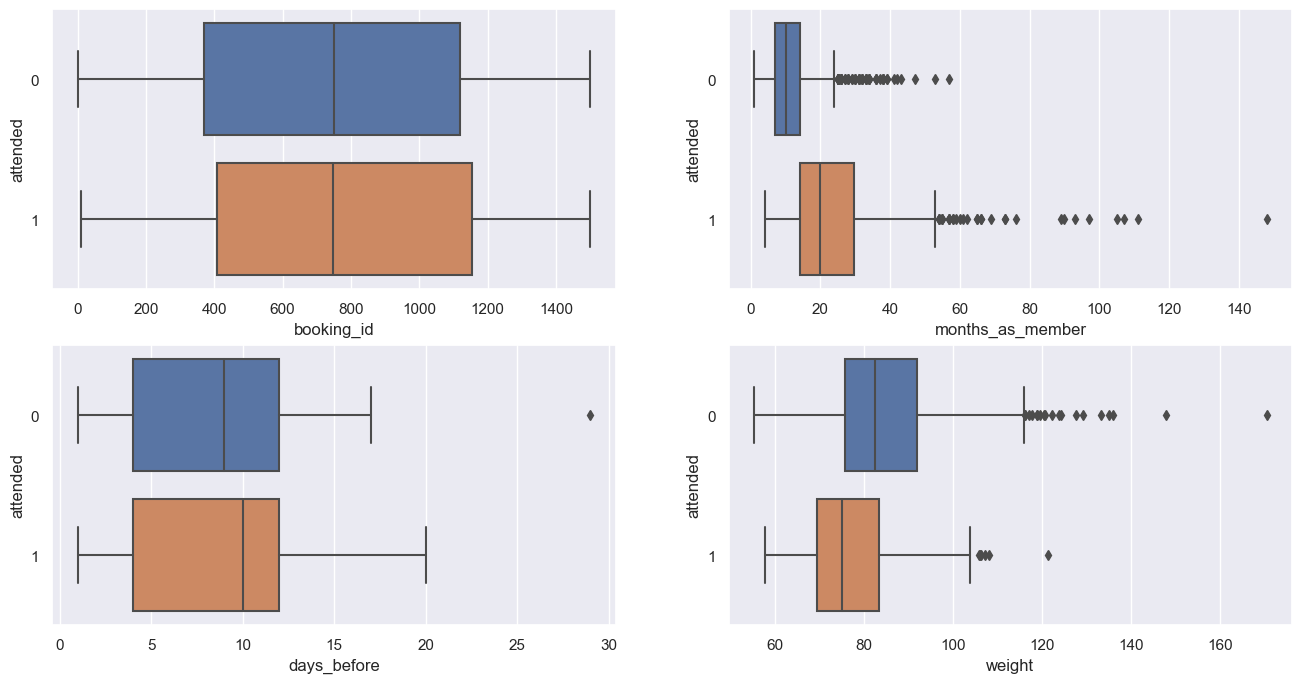

In [40]:
plot_multiples_graficas(data_num, data.select_dtypes('int64').columns.tolist()+data.select_dtypes('float64').columns.tolist(), 2, 2, 'b', 'attended', figsize=(16,8))

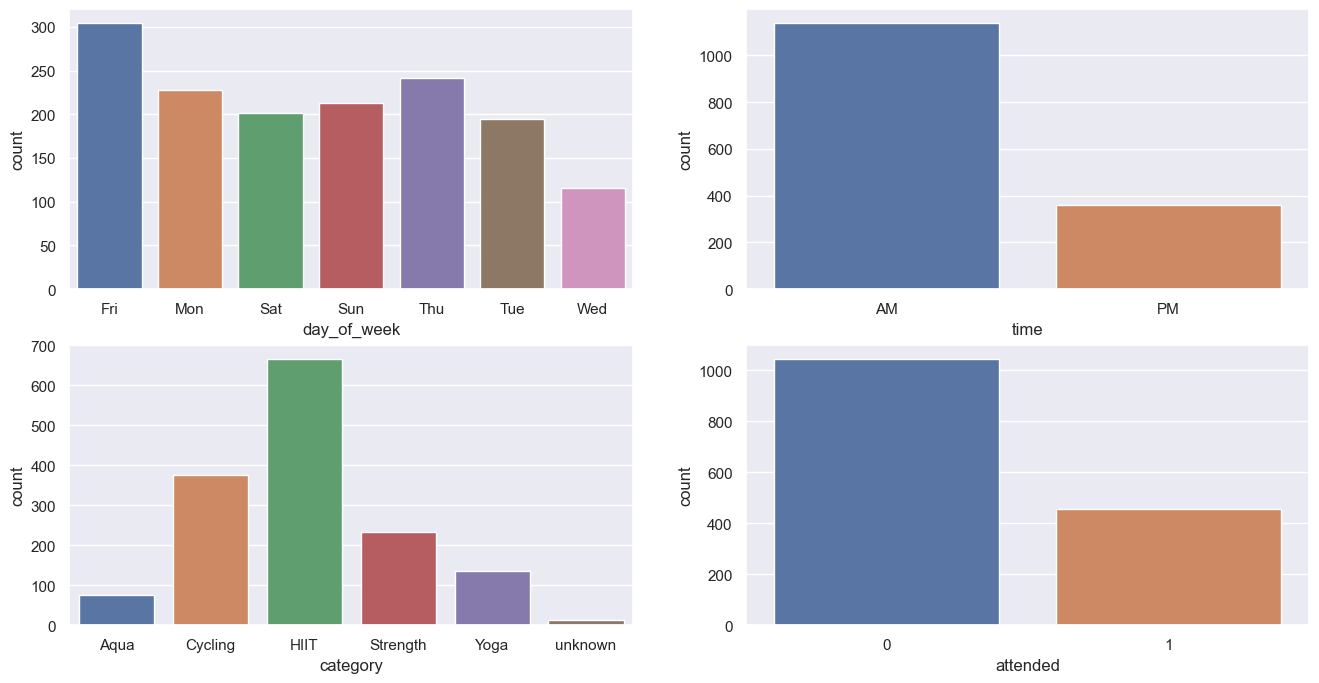

In [41]:
plot_multiples_graficas(data_cat, data_cat.columns, 2, 2, 'c', 'attended', figsize=(16,8))

In the GoalZone company's dataset, the output variable attendand is not balanced because the majority of the records do not go to class, as can be seen in the second chart. It can also be seen that:

-In the weight variable, the median weight of those who do not go to class is 	higher than the weight of those who do go to class
-Those who have been at the gym for more months tend to go to more classes 		than those who have not,
-The day when they go to class the most are Fridays.
-In the days before column, there is not a significant difference between people who go to class and those who do not.
- The most popular class is the HIIT class.


## Task 3
### 3. Describe the distribution of the number of months as a member. 
Your answer must include a visualization that shows the distribution.

In [54]:
data['months_as_member'].describe()

count    1500.000000
mean       15.628667
std        12.926543
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max       148.000000
Name: months_as_member, dtype: float64

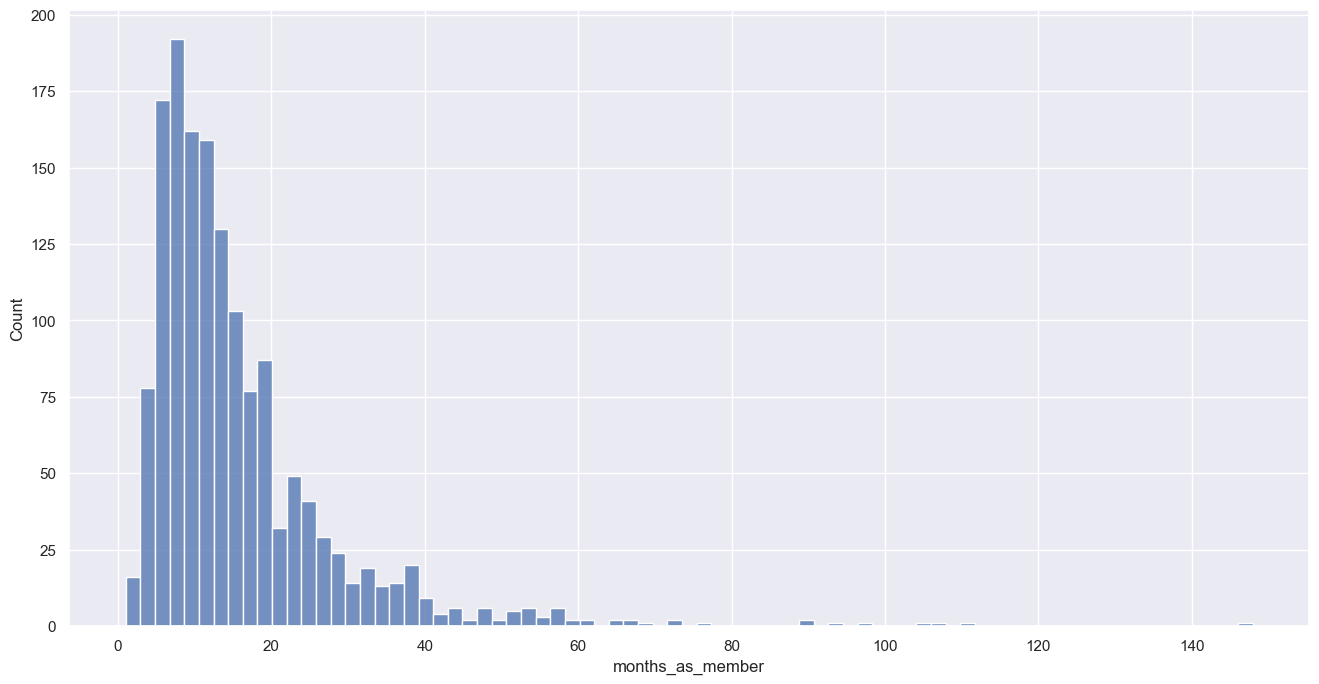

In [53]:
sns.histplot(data['months_as_member'])
plt.show()

According to the percentiles and the plot it can be infered that the majority of the records in the dataset comes from people that is relatybly new to the gim, with a mean of 15.62 months

## Task 4
### 4. Describe the relationship between attendance and number of months as a member.
Your answer must include a visualization to demonstrate the relationship.

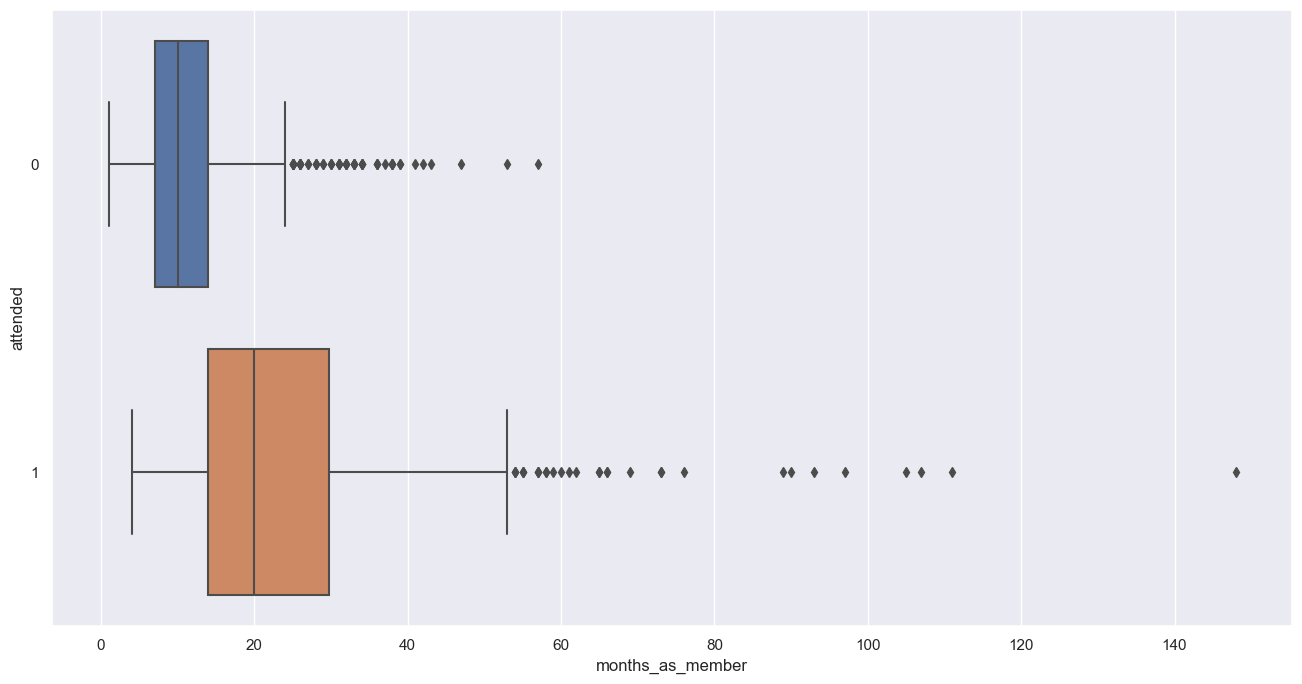

In [42]:
sns.boxplot(data=data,x='months_as_member', y='attended')
plt.show()

In [43]:
summary = data['months_as_member'].describe()
iqr = summary['75%'] - summary['25%']
lower_bound = summary['25%'] - 1.5 * iqr
upper_bound = summary['75%'] + 1.5 * iqr
outliers = data[(data['months_as_member'] < lower_bound) | (data['months_as_member'] > upper_bound)]
outliers_attended_cero=outliers[outliers['attended']==0]
outliers_attended_one=outliers[outliers['attended']==1]
print(f'there are {len(outliers_attended_cero)} outliers when the attended is cero and {len(outliers_attended_one)} outliers when the attended is one ')

there are 16 outliers when the attended is cero and 87 outliers when the attended is one 


When the attendand and months as members columns are compared, the median for people who go to classes is much highe. When they do not go to classes, they are people who have been exercising for a short time and have been training for between 0 and 1 year.These outliers are not necessarily bad data, but rather they are people who have been training for a long time and enjoy classes. For this reason, they are not eliminated from the dataset. 

## Task 5
### 5. The business wants to predict whether members will attend using the data provided.
State the type of machine learning problem that this is (regression/ classification/
clustering).

Based on the information of the dataset and the review just made, it seems that a machine learning model for **classification** would be a good solution for GoalZone to improve attendance at fitness classes.

Classification models can be used to predict whether a member will attend a class or not based on his/her features. By using a machine learning model, GoalZone can automatically learn the relationships between these features and the target outcome based on the training data.

However, it is important to note that the success of the model will be damage because the dataset is inbalance on people who dont go to classes, which makes a little bit hard to predict on the positive response,and that is the data available. and that's our main goal to predict the yes for the bussiness case.

## Task 6
### 6. Fit a baseline model to predict whether members will attend using the data provided.
You must include your code.

### Make changes to enable modeling with scikit learn

In [44]:
y=data['attended']
features = data.drop(columns=['attended','booking_id'])

In [45]:
scaler = MinMaxScaler()
scaler.fit(features[['months_as_member','weight','days_before']])
features[['months_as_member','weight','days_before']] = scaler.transform(features[['months_as_member','weight','days_before']])
features.head()

,months_as_member,weight,days_before,day_of_week,time,category
0,0.108844,0.209799,0.250000,Wed,PM,Strength
1,0.061224,0.205021,0.035714,Mon,AM,HIIT
2,0.102041,0.166102,0.464286,Sun,AM,Strength
3,0.027211,0.266788,0.321429,Fri,AM,Cycling
4,0.095238,0.120580,0.250000,Thu,AM,HIIT


In [46]:
df_dummies = pd.get_dummies(features, columns=['time','category','day_of_week'])
df_dummies.head()

,months_as_member,weight,days_before,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga,category_unknown,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed
0,0.108844,0.209799,0.250000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0.061224,0.205021,0.035714,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0.102041,0.166102,0.464286,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0.027211,0.266788,0.321429,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0.095238,0.120580,0.250000,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [47]:
# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(df_dummies, y, test_size=0.3, random_state=123)

### Method 1: Logistic Regression Model

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log =logreg.predict(X_test)

## Task 7
### 7. Fit a comparison model to predict whether members will attend using the data
provided. You must include your code.

### Method 2: Decision Tree Model

In [49]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

## Task 8
### 8. Explain why you chose the two models used in parts 6 and 7.

I chose the logistic regression and decision tree models for the following reasons:

Logistic regression:

Is a very well known  statistical method for binary classification and that is what we need for our goal that is a type of classification where there are only two possible outcomes.
In this case, the two possible outcomes are positive attendance (going to class) and negative attendance (not going to class).

Decision trees:

Decision trees can handle complex relationships between variables, making them more accurate in some cases like this one that the dataset may not be balanced in our favor. also this method can be performed quickly with little computational  cost


## Task 9
### 9. Compare the performance of the two models used in parts 6 and 7, using any method suitable.
You must include your code.

===========Accuracy Score ================
LogisticRegression: 0.7377777777777778


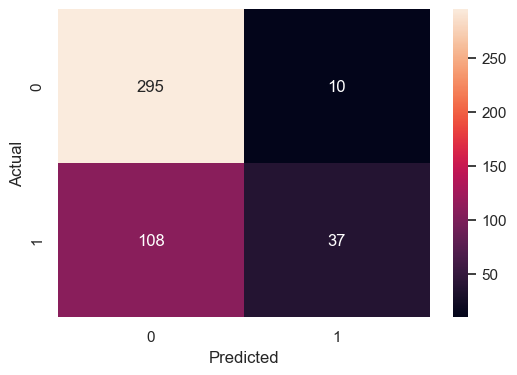

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       305
           1       0.79      0.26      0.39       145

    accuracy                           0.74       450
   macro avg       0.76      0.61      0.61       450
weighted avg       0.75      0.74      0.69       450



In [50]:
print("===========Accuracy Score ================")
print("LogisticRegression:",accuracy_score(y_test, y_pred_log))
conf_mat = confusion_matrix(y_test, y_pred_log)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=y.sort_values().unique()
            , yticklabels=y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, y_pred_log))

===========Accuracy Score ================
DecisionTreeClassifier: 0.72


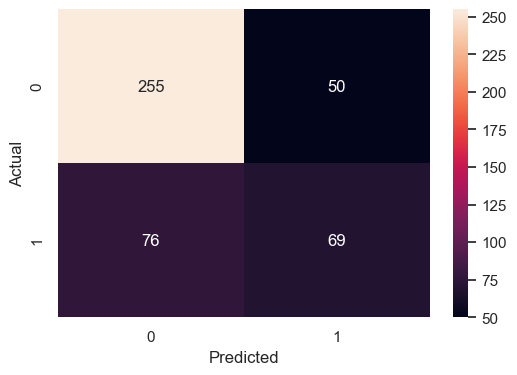

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       305
           1       0.58      0.48      0.52       145

    accuracy                           0.72       450
   macro avg       0.68      0.66      0.66       450
weighted avg       0.71      0.72      0.71       450



In [55]:
print("===========Accuracy Score ================")
print("DecisionTreeClassifier:",accuracy_score(y_test, y_pred_clf))
conf_mat = confusion_matrix(y_test, y_pred_clf)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=y.sort_values().unique()
            , yticklabels=y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, y_pred_clf))

## Task 10

### 10. Explain which model performs better and why


For the business problem that GoalZone has of increasing the probability that people will attend classes, the best model is the **decision tree model** because it predicts positive values more accurately than the logistic regression model, even though logistic regression has a larger R2. The decision tree model is superior for our goal in the project.

The decision tree model is more effective at identifying the most important factors that influence positive attendance and predicting a person will attend to a class as the confusion matrix show us.

It is able to predict more accurately the positive attendance and help the company identify the key factors that drive attendance.

Machine learning can be a useful tool for businesses like GoalZone to improve their operations and decision-making processes by  identifying trends and patterns that help making more accurate decisions as expanding the classes area, which leads to improved customer satisfaction and profitability.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam